# Neural Network with [Kera](https://keras.io/losses/)

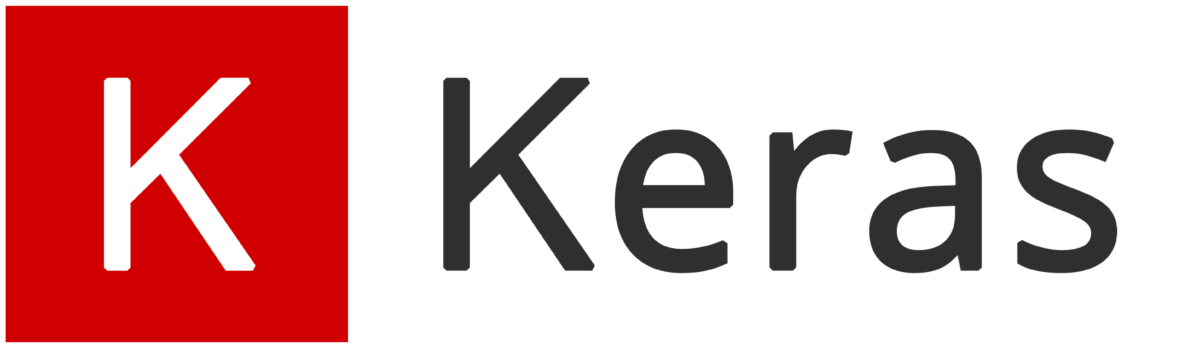


Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

Use Keras if you need a deep learning library that:

- Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
- Supports both convolutional networks and recurrent networks, as well as combinations of the two.
- Runs seamlessly on CPU and GPU.

# Neural network for binary classficiation

## Dataset: Parkinsons Disease

__Oxford Parkinson's Disease Detection Dataset__

This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an 
instance corresponding to one voice recording. There are around six 
recordings per patient, the name of the patient is identified in the first 
column.For further information or to pass on comments, please contact Max 
Little (littlem '@' robots.ox.ac.uk).

Attribute Information:

Matrix column entries (attributes):
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- status - Health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE,D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data

#### Imports

In [1]:
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

from keras.layers import Dropout

#set seed for reproduction purpose
from numpy.random import seed
seed(1) 

from tensorflow import set_random_seed
set_random_seed(2)

import random as rn
rn.seed(12345)

import tensorflow as tf
tf.set_random_seed(1234)

#import seaborn as sns

Using TensorFlow backend.


#### Load and standarise data

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"

names = ["name","MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ",
         "Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA",
         "NHR","HNR","status","RPDE","DFA","spread1","spread2","D2","PPE"]

parkinson_df = pd.read_csv(url, names=names) #load CVS data

data = parkinson_df.loc[1:,["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ",
         "Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA",
         "NHR","HNR","RPDE","DFA","spread1","spread2","D2","PPE"]].values.astype(np.float)
target = parkinson_df.loc[1:, ['status']].values.astype(np.float)


data = StandardScaler().fit_transform(data)

data_train, data_test, target_train, target_test = \
train_test_split(data, target, test_size=0.3, random_state=545)

#### Build neural network with Keras using [Sequential model](https://keras.io/getting-started/sequential-model-guide/)



In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
neural_model = Sequential([
    Dense(2, input_shape=(22,), activation="relu"), #why 22 inputs?
  #  Dense(2, activation="relu"),
    Dense(1, activation="sigmoid")
])

#show summary of a model
neural_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 46        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


#### Training neural model

In [4]:
neural_model.compile(SGD(lr = .003), "binary_crossentropy", \
                     metrics=["accuracy"])

np.random.seed(0)
run_hist_1 = neural_model.fit(data_train, target_train, epochs=4000,\
                              validation_data=(data_test, target_test), \
                              verbose=True, shuffle=False)

print("Training neural network...\n")

print('Accuracy over training data is ', \
      accuracy_score(target_train, neural_model.predict_classes(data_train)))

print('Accuracy over testing data is ', \
      accuracy_score(target_test, neural_model.predict_classes(data_test)))

conf_matrix = confusion_matrix(target_test, neural_model.predict_classes(data_test))
print(conf_matrix)

_loss: 0.4129 - val_accuracy: 0.7966
Epoch 3868/4000
136/136 [==============================] - 0s 338us/step - loss: 0.1751 - accuracy: 0.9265 - val_loss: 0.4129 - val_accuracy: 0.7966
Epoch 3869/4000
136/136 [==============================] - 0s 367us/step - loss: 0.1751 - accuracy: 0.9265 - val_loss: 0.4129 - val_accuracy: 0.7966
Epoch 3870/4000
136/136 [==============================] - 0s 257us/step - loss: 0.1751 - accuracy: 0.9265 - val_loss: 0.4129 - val_accuracy: 0.7966
Epoch 3871/4000
136/136 [==============================] - 0s 250us/step - loss: 0.1751 - accuracy: 0.9265 - val_loss: 0.4129 - val_accuracy: 0.7966
Epoch 3872/4000
136/136 [==============================] - 0s 316us/step - loss: 0.1751 - accuracy: 0.9265 - val_loss: 0.4129 - val_accuracy: 0.7966
Epoch 3873/4000
136/136 [==============================] - 0s 301us/step - loss: 0.1751 - accuracy: 0.9265 - val_loss: 0.4129 - val_accuracy: 0.7966
Epoch 3874/4000
136/136 [==============================] - 0s 345us/s

#### Visualizing the learning process

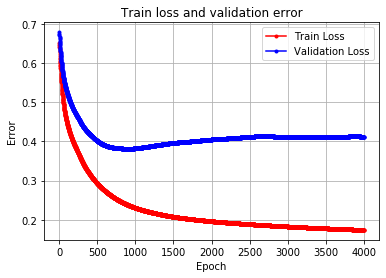

In [5]:
#run_hist_1.history.keys()

plt.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
plt.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
plt.title("Train loss and validation error")
plt.legend()
plt.xlabel('Epoch'), plt.ylabel('Error')
plt.grid()

### What can be oberved form the plot? Why would we might be interested in having longer training phase?

### Answer:
We can determine when overfitting and underfitting occurs. If validation loss starts increasing it is time to stop.

### Student task 1: 
- Learn more about [Dense](https://keras.io/layers/core/) layer, available [activation function](https://keras.io/activations/) and [optimizers](https://keras.io/optimizers/),
- Build neural network with more than 4 layers having different activation function in each layer. Train it and visual the results. 

### Build neural network with Keras using Sequential model with Dropout

In [6]:
#model with dropouts

neural_network_d = Sequential()
neural_network_d.add(Dense(2, activation='relu', input_shape=(22,)))
neural_network_d.add(Dropout(0.1))
#neural_network_d.add(Dense(2, activation='relu'))
#neural_network_d.add(Dropout(0.1))
neural_network_d.add(Dense(1, activation='sigmoid'))

neural_network_d.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 46        
_________________________________________________________________
dropout_1 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [7]:
neural_network_d.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])

run_hist_2 = neural_network_d.fit(data_train, target_train, epochs=4000, \
                                  validation_data=(data_test, target_test), \
                                  verbose=False, shuffle=False)

print("Training neural network w dropouts..\n")

print('Accuracy over training data is ', accuracy_score(target_train, \
                                                        neural_network_d.predict_classes(data_train)))

print('Accuracy over testing data is ', accuracy_score(target_test, \
                                                       neural_network_d.predict_classes(data_test)))



KeyboardInterrupt: 

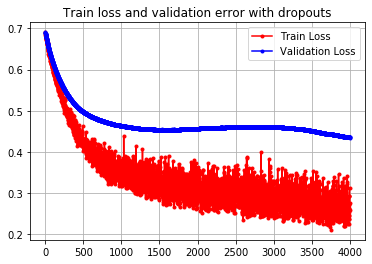

In [8]:
plt.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
plt.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
plt.title("Train loss and validation error with dropouts")
plt.legend()
plt.grid()

What is the benefits of using dropouts?

### Student task 2
- Add dropouts to neural network from task 1 and compere the results.

# Neural network for multiclass classification on mnist data


In [9]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
images_train =  []
for image_train in x_train:
    images_train.append(image_train.flatten())

images_test = []

for image_test in x_test:
    images_test.append(image_test.flatten())

images_train = np.array(images_train)
images_test = np.array(images_test)

from keras.utils import normalize
images_train = normalize(images_train)
images_test = normalize(images_test)


from keras.utils.np_utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [11]:
neural_network_mnist = Sequential()
neural_network_mnist.add(Dense(50, activation='relu', input_shape=(784,)))
#neural_network_mnist.add(Dense(20, activation='relu'))
#neural_network_mnist.add(Dropout(0.01))
neural_network_mnist.add(Dense(10, activation='softmax'))

neural_network_mnist.summary()

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9)
neural_network_mnist.compile(optimizer=sgd, loss="categorical_crossentropy", \
                             metrics=["accuracy"])

run_hist_3 = neural_network_mnist.fit(images_train, y_train_categorical, epochs=20, \
                                  validation_data=(images_test, y_test_categorical), \
                                  verbose=True, shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.4063 - acc: 0.8807 - val_loss: 0.2375 - val_acc: 0.9234
Epoch 2/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.2051 - acc: 0.9381 - val_loss: 0.1632 - val_acc: 0.9490
Epoch 3/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.1556 - acc: 0.9532 - val_loss: 0.1341 - val_acc: 0.9604
Epoch 4/20
60000/60000 [==============================] - 8s 133us/ste

### Save neural model

In [12]:
neural_network_mnist.save('mnist-model.h5')

### Visualizing training

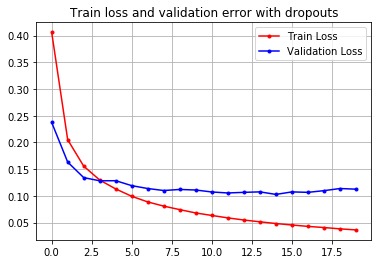

In [13]:
plt.plot(run_hist_3.history["loss"],'r', marker='.', label="Train Loss")
plt.plot(run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")
plt.title("Train loss and validation error with dropouts")
plt.legend()
plt.grid()

### Load trained neural model

In [14]:
from keras.models import load_model
model = load_model('mnist-model.h5')

In [15]:
print("Model evaluation [loss, accu]: ", model.evaluate(images_test, y_test_categorical))

10000/10000 [==============================] - 1s 59us/step
Model evaluation [loss, accu]:  [0.1124371387562831, 0.9707]


### Usage of a trained neural model

Neural netowrk predicts:
[[9.5833050e-11 3.1056177e-07 8.0021323e-10 9.9998415e-01 2.3926574e-09
  7.7433333e-06 1.5256477e-13 2.8726335e-10 7.5038865e-06 3.1345999e-07]]

Neural network recognized image as: 3


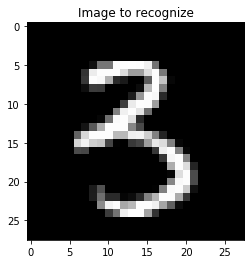

In [16]:
id = 5000

print("Neural netowrk predicts:")
print(model.predict(images_test[id,:].reshape(-1,784)))

plt.imshow(images_test[id,:].reshape(28,28), cmap=plt.get_cmap("gray"))
plt.title('Image to recognize')

print("\nNeural network recognized image as:", np.argmax(model.predict(images_test[id,:].reshape(-1,784))))

### Student task 3

Build __two__ neural network based regression model to predict "Boston housing" price. One without dropouts and one with droputs. Remember to use aprioprate loss function and activation in output layer. Evaluate model and visual learning process. Experiments with different network architecture and optimization parameters. Use data from Keras library. 

In [17]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

...

Ellipsis